In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-data/yolo_dataset/data.yaml
/kaggle/input/yolo-data/yolo_dataset/labels/val/450_1000+%281%29.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/c1f88290d602f0e6_jpg.rf.mQMBMSP5KAanVt15Z7Ji.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/8ccad0d567bc7aad_jpg.rf.bbeeab003239f3c9854ed0d97fbc3520.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/59b1c028bd8b08dc_jpg.rf.hZvI4yexc1c6709HMKkq.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/a3cffcdbff959432_jpg.rf.1f1f8cfcdfe052a8ec72e63b11889b66.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/cf165ec304d2b2dc_jpg.rf.1038a595a2a468537b6b88d3abeb03c4.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/images.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/47b09b34e24b4039_jpg.rf.9274b35afd28c89ed4221e69e765e71d.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/6d5d24e86c1ff260_jpg.rf.xc7Xmsiy5QL5Ux1uJ7Lv.txt
/kaggle/input/yolo-data/yolo_dataset/labels/val/Captura+de+pantalla+2025-06-02+131500.txt
/kaggle/

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alkanerturan/vehicledetection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicledetection


In [21]:
!pip install ultralytics roboflow tfrecord tensorflow protobuf opencv-python-headless


In [22]:
import os
import io
import cv2
import pandas as pd

In [7]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [22]:
# 📂 Crear carpetas para imágenes y anotaciones
!mkdir -p yolo_dataset/images/train yolo_dataset/labels/train
!mkdir -p yolo_dataset/images/val yolo_dataset/labels/val

In [23]:
# Crear modelo desde base preentrenada
model = YOLO('yolov8n.pt')


In [9]:

# Entrenar con tus datos
model.train(data="/kaggle/input/yolo-data/yolo_dataset/data.yaml", 
            epochs=50,
            imgsz=960, # Tamaño de entrada de las imágenes.
            batch=16, #Tamaño del batch (número de imágenes por paso).
            lr0=0.001, # tasa de aprendizaje inicial.
            lrf=0.01, #factor de reducción al final del entrenamiento.
            optimizer="Adam",
            patience=15, #Número de épocas sin mejora antes de detener el entrenamiento temprano.
            #Aumentos de datos / Augmentations
            degrees=5,
            scale=0.5,
            shear=0.1,
            fliplr=0.5,
            #Modifican el color, saturación y brillo como augmentations.
            hsv_h=0.015,
            hsv_s=0.7,
            hsv_v=0.4,
            label_smoothing=0.05 #Ayuda a reducir sobreajuste, haciendo que el modelo no sea tan "confiante" con sus predicciones.
           )

WARNING ⚠️ 'label_smoothing' is deprecated and will be removed in in the future.
Ultralytics 8.3.147 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/yolo-data/yolo_dataset/data.yaml, degrees=5, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, o

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 12.7±5.7 MB/s, size: 88.4 KB)


train: Scanning /kaggle/input/yolo-data/yolo_dataset/labels/train... 282 images, 0 backgrounds, 0 corrupt: 100%|██████████| 282/282 [00:00<00:00, 336.84it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/yolo-data/yolo_dataset/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.4±9.1 MB/s, size: 47.0 KB)


val: Scanning /kaggle/input/yolo-data/yolo_dataset/labels/val... 136 images, 0 backgrounds, 0 corrupt: 100%|██████████| 136/136 [00:00<00:00, 308.75it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/yolo-data/yolo_dataset/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.43G      1.603      2.995      1.818         43        960: 100%|██████████| 18/18 [00:06<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        136        535    0.00547      0.324     0.0209    0.00668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.77G      1.576      2.098      1.758         59        960: 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.31it/s]

                   all        136        535    0.00485      0.313     0.0302    0.00844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.78G      1.463      1.746      1.724         41        960: 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        136        535      0.725      0.235       0.31      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.8G      1.436      1.618      1.717         42        960: 100%|██████████| 18/18 [00:05<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.19it/s]

                   all        136        535      0.781      0.458      0.559      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.81G      1.412      1.547      1.715         50        960: 100%|██████████| 18/18 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.51it/s]

                   all        136        535      0.771      0.469       0.55       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.83G      1.429      1.504      1.679         53        960: 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.29it/s]

                   all        136        535      0.677      0.443       0.52      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.85G      1.366      1.463      1.615         39        960: 100%|██████████| 18/18 [00:05<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        136        535      0.714      0.514      0.632       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.87G      1.447      1.514      1.677         52        960: 100%|██████████| 18/18 [00:05<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.36it/s]

                   all        136        535      0.706      0.534      0.592      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.88G      1.373      1.432      1.647         71        960: 100%|██████████| 18/18 [00:05<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        136        535      0.694      0.568      0.637       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.9G      1.406      1.422      1.677         49        960: 100%|██████████| 18/18 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        136        535        0.7      0.596      0.658       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.92G      1.377      1.358      1.612         41        960: 100%|██████████| 18/18 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        136        535      0.808      0.706      0.792       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.94G      1.299      1.199      1.528         56        960: 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

                   all        136        535      0.772      0.689      0.762      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.95G      1.325      1.222      1.566         45        960: 100%|██████████| 18/18 [00:05<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.34it/s]

                   all        136        535      0.798      0.694      0.776      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.97G      1.284      1.181      1.559         47        960: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.69it/s]

                   all        136        535      0.821      0.657      0.766      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.99G      1.296      1.204      1.532         37        960: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        136        535      0.754      0.696      0.748      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         6G      1.252      1.167      1.524         40        960: 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        136        535      0.827      0.671       0.76      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.02G       1.24      1.135      1.489         61        960: 100%|██████████| 18/18 [00:05<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        136        535      0.835      0.677       0.77      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.04G      1.269      1.131      1.533         53        960: 100%|██████████| 18/18 [00:05<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

                   all        136        535       0.83      0.716      0.801      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.06G       1.26      1.125      1.501         49        960: 100%|██████████| 18/18 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        136        535      0.791      0.757      0.812      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.07G       1.23      1.055      1.474         36        960: 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        136        535      0.841      0.697      0.795      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.09G      1.261      1.022      1.501         40        960: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.43it/s]

                   all        136        535      0.791      0.726      0.786      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.11G      1.219      1.075       1.51         63        960: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.47it/s]

                   all        136        535      0.823      0.728      0.799      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.12G      1.137     0.9848      1.454         56        960: 100%|██████████| 18/18 [00:05<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.73it/s]

                   all        136        535      0.832      0.717       0.81      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      6.14G        1.2     0.9993      1.472         44        960: 100%|██████████| 18/18 [00:05<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.24it/s]

                   all        136        535      0.872      0.694      0.816      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      6.16G      1.152     0.9259      1.403         47        960: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.25it/s]

                   all        136        535      0.847      0.737      0.825       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      6.18G      1.186     0.9349      1.441         40        960: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.57it/s]

                   all        136        535      0.891      0.693      0.804      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      6.19G      1.147      0.949      1.459         49        960: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.35it/s]

                   all        136        535       0.81      0.698      0.775       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      6.21G      1.132      0.942      1.441         53        960: 100%|██████████| 18/18 [00:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.37it/s]

                   all        136        535      0.868      0.725      0.826      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      6.23G      1.102     0.8988      1.404         53        960: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all        136        535      0.847      0.719      0.809      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      6.24G      1.141     0.9037      1.394         33        960: 100%|██████████| 18/18 [00:05<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all        136        535      0.829      0.737      0.818      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.26G       1.12     0.9137      1.413         55        960: 100%|██████████| 18/18 [00:05<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.38it/s]

                   all        136        535      0.871      0.732      0.837      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.28G      1.082     0.8872      1.371         69        960: 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.56it/s]

                   all        136        535      0.869      0.752      0.841      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.29G      1.119     0.8923      1.427         41        960: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        136        535      0.862      0.719      0.811      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.31G      1.087     0.8527      1.378         42        960: 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.50it/s]

                   all        136        535      0.855      0.752      0.829      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.33G      1.068     0.8417      1.358         49        960: 100%|██████████| 18/18 [00:05<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.49it/s]

                   all        136        535      0.842      0.765      0.843        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.35G       1.07     0.8425      1.374         33        960: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

                   all        136        535      0.845      0.776      0.847      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.36G      1.052     0.8427      1.396         59        960: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]

                   all        136        535      0.832      0.788       0.85      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.38G      1.049     0.7714      1.345         44        960: 100%|██████████| 18/18 [00:05<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.17it/s]

                   all        136        535      0.857      0.764      0.853      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       6.4G      1.027     0.7739      1.328         58        960: 100%|██████████| 18/18 [00:05<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]

                   all        136        535       0.86      0.774      0.853      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.42G       1.05     0.7705      1.324         70        960: 100%|██████████| 18/18 [00:05<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        136        535      0.835      0.791      0.848      0.497


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.43G      1.126     0.8729      1.416         32        960: 100%|██████████| 18/18 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.27it/s]

                   all        136        535      0.824       0.79       0.84      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.45G      1.077     0.7939      1.373         28        960: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.22it/s]

                   all        136        535      0.784      0.789      0.831      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.47G      1.061     0.7696       1.35         37        960: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]

                   all        136        535      0.847      0.806      0.844      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.49G      1.038     0.7396      1.346         19        960: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        136        535      0.878      0.783      0.859      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       6.5G      0.963     0.6604      1.294         36        960: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.44it/s]

                   all        136        535      0.877       0.77      0.856      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.52G     0.9672     0.6736      1.275         19        960: 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.54it/s]

                   all        136        535      0.918      0.738      0.858      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.53G     0.9635     0.6364      1.279         13        960: 100%|██████████| 18/18 [00:05<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.40it/s]

                   all        136        535      0.893      0.758      0.864      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.55G     0.9472     0.6494      1.286         21        960: 100%|██████████| 18/18 [00:05<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.64it/s]

                   all        136        535       0.87      0.774      0.859       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.57G     0.9479     0.6335      1.297         30        960: 100%|██████████| 18/18 [00:05<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        136        535      0.867      0.777      0.862      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.59G     0.9335     0.6458      1.275         17        960: 100%|██████████| 18/18 [00:05<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.65it/s]

                   all        136        535      0.867      0.781      0.862      0.508



50 epochs completed in 0.104 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.147 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        136        535      0.892      0.758      0.864      0.515
                 carro         97        304      0.876      0.747      0.873      0.496
                  moto         46        231      0.908      0.769      0.855      0.534
Speed: 0.5ms preprocess, 5.6ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785dde5a0510>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [24]:
# 📁 Leer resultados
df = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
print("Resumen de métricas:")
df.head()

Resumen de métricas:


epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   9.16803         1.60286         2.99481         1.81808   
1      2  16.58340         1.57629         2.09783         1.75751   
2      3  24.11680         1.46284         1.74589         1.72445   
3      4  31.35750         1.43564         1.61844         1.71722   
4      5  38.43160         1.41167         1.54718         1.71498   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00547            0.32369           0.02094   
1               0.00485            0.31313           0.03016   
2               0.72497            0.23481           0.31016   
3               0.78111            0.45828           0.55944   
4               0.77089            0.46949           0.54995   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.00668       2.56453       4.17691       3.55924  0.083170   
1              0.00844       2.40997       4.30603       3.43963  0.065343   
2              0.15311       1.95221       3.11017       2.41377  0.047509   
3              0.27873       1.91677       2.29951       2.14312  0.029668   
4              0.28986       1.96067       2.18242       2.20101  0.011820   

     lr/pg1    lr/pg2  
0  0.000170  0.000170  
1  0.000343  0.000343  
2  0.000509  0.000509  
3  0.000668  0.000668  
4  0.000820  0.000820

In [11]:
import matplotlib.pyplot as plt

Precision promedio:  0.7883869999999998


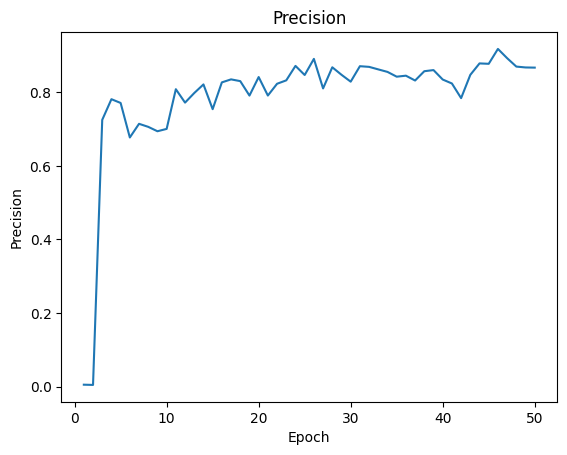

In [12]:
# Curva de precision conn matplotlib
plt.figure()
plt.plot(df['epoch'], df['metrics/precision(B)'])
plt.title('Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
# promedio precision
print("Precision promedio: ", df['metrics/precision(B)'].mean())

Recall promedio:  0.6793465999999999


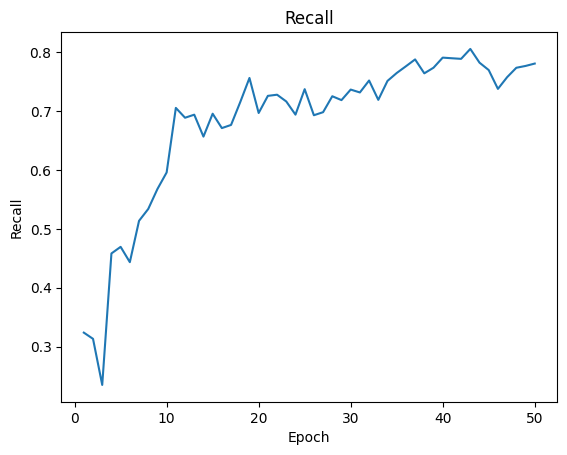

In [13]:
# CURVA DE RECALL
plt.figure()
plt.plot(df['epoch'], df['metrics/recall(B)'])
plt.title('Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')

#Promedio recall
print("Recall promedio: ", df['metrics/recall(B)'].mean())

## Prediccion

In [14]:
from PIL import Image

In [35]:
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")

In [37]:
# Ruta a la carpeta con las imágenes
image_folder = "/kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images"

# Obtener lista de imágenes (solo jpg/png)
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png'))][10:20]



In [33]:
image_files


['c0a105b4fe3a7c55_jpg.rf.TtrieGEGo7xyvdhMBtWt.jpg',
 '64918de984156adf_jpg.rf.oG9xHqC6y9JQHQyqJ3y8.jpg',
 '58163cb625c30451_jpg.rf.qzv8RVHFUESFStEECs8Y.jpg',
 '00e481ea1a520175_jpg.rf.6e6a8b3b45c9a11d106958f88ff714ea.jpg',
 '3281f85bb3265523_jpg.rf.h2dkv1fIXvgeK5x8f1Te.jpg',
 '6dce4caa5b30c32a_jpg.rf.ptCAjjugxBjYRY2Pe2IP.jpg',
 '2eaf88e3156629c6_jpg.rf.2a8LCMIPEihcmaF7wMjX.jpg',
 '58163cb625c30451_jpg.rf.f224c9704e2d5d99e2da9e3815ce4374.jpg',
 '95bf6406c152cf40_jpg.rf.58a7d5b1c4309ad003108642c51ae8b3.jpg',
 'f00ec0093e986e99_jpg.rf.NXMKhuok0UUZl1iUn9IE.jpg']


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/e36e433eed49a09d_jpg.rf.vp4voN7BUsf5abwtFHbx.jpg: 960x960 1 carro, 12.2ms
Speed: 5.8ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 960, 960)


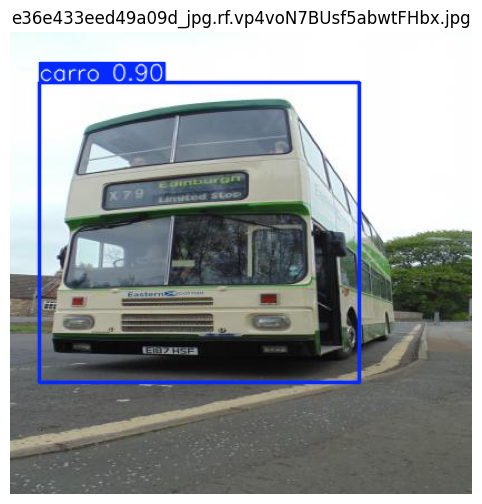


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/72e16f7160358c50_jpg.rf.p1glBr5tchCYf248Nu0S.jpg: 960x960 1 carro, 12.2ms
Speed: 4.6ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 960)


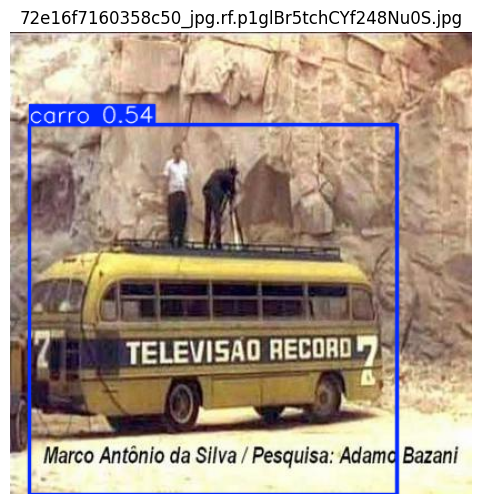


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/9876c285fe7bc3a0_jpg.rf.iBBVQWEpeWVbehE5MJ6Q.jpg: 960x960 1 carro, 12.1ms
Speed: 5.0ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)


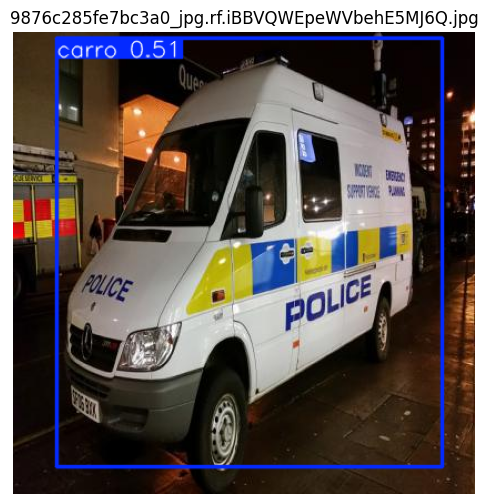


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/b778de31063c80ef_jpg.rf.wETmgEiHs4taG421vJ6e.jpg: 960x960 1 carro, 12.1ms
Speed: 5.6ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)


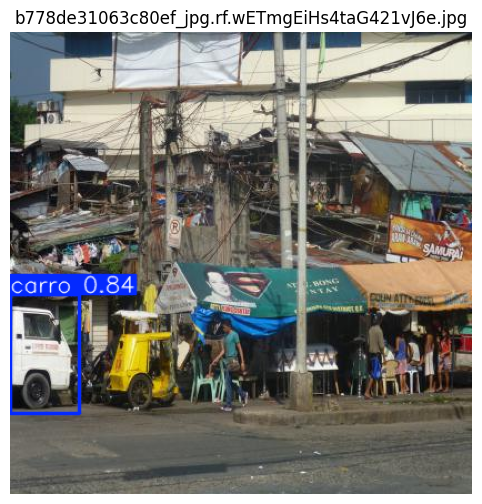


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/95bf6406c152cf40_jpg.rf.2KlhzCSeifqpfUPfwyW9.jpg: 960x960 2 carros, 12.2ms
Speed: 4.5ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)


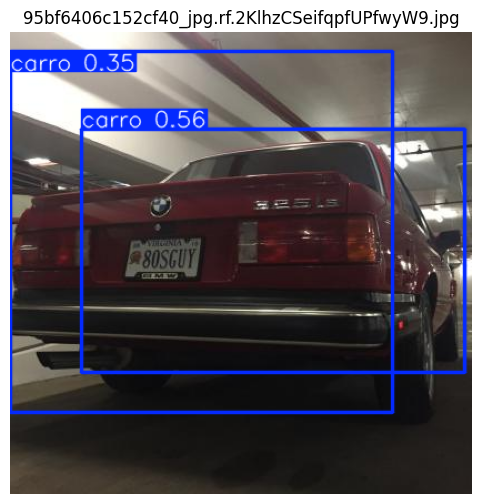


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/621edf1632f6f63c_jpg.rf.mHET2dhSa787SiBvJxBE.jpg: 960x960 2 carros, 12.2ms
Speed: 4.9ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 960)


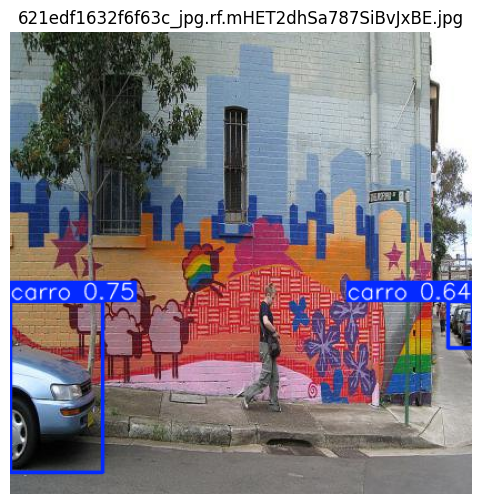


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/259ff749ac781352_jpg.rf.CZyKDHyPjIcTpIwNJ2rd.jpg: 960x960 3 carros, 12.3ms
Speed: 5.8ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)


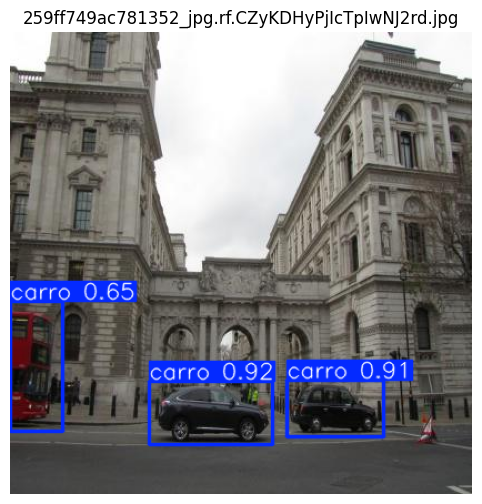


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/958efc095c686ef6_jpg.rf.963de21446d75d8452e417c3c262b9a8.jpg: 960x960 1 carro, 12.1ms
Speed: 6.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 960, 960)


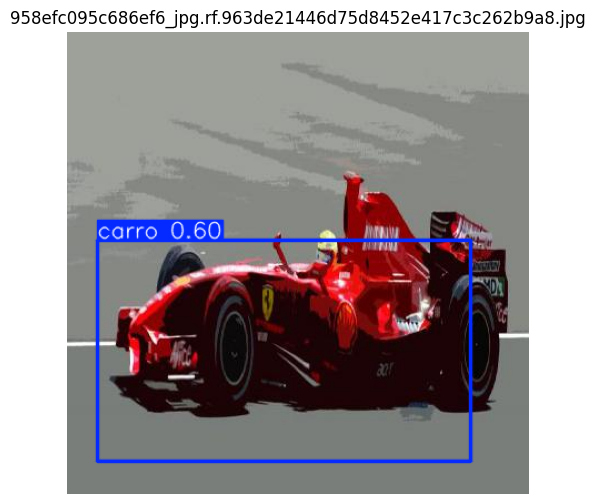


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/b3736bcf6bec5308_jpg.rf.988ed2199cddfaecb34a83859649121b.jpg: 960x960 2 carros, 12.1ms
Speed: 4.9ms preprocess, 12.1ms inference, 2.4ms postprocess per image at shape (1, 3, 960, 960)


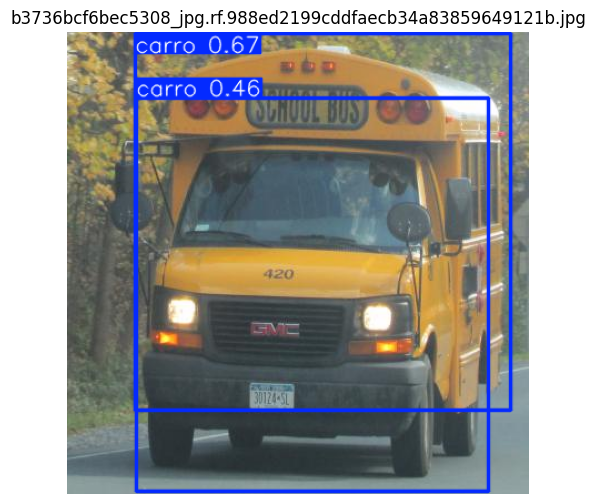


image 1/1 /kaggle/input/vehicledetection/VehiclesDetectionDataset/test/images/fcbbda4f0678bfcf_jpg.rf.ba5680ddca55276fe0495e0622f5af0d.jpg: 960x960 2 carros, 12.1ms
Speed: 4.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 960, 960)


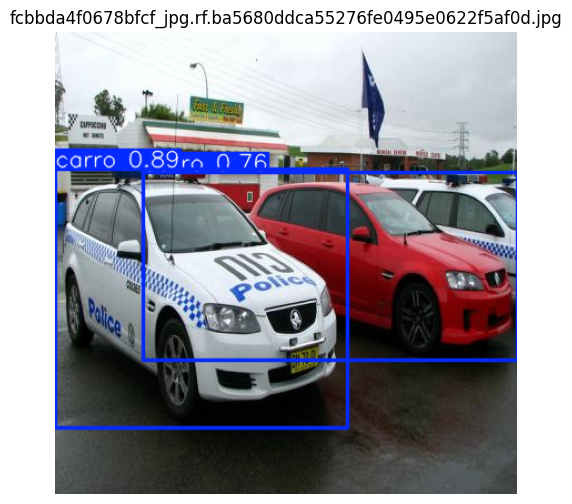

In [38]:
# Realizar predicciones y mostrar resultados
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)

    # Predecir
    results = model(image_path)

    # Renderizar resultados en la imagen (YOLO lo hace internamente)
    result_image = results[0].plot()

    # Mostrar imagen con matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [41]:
video_path = "/kaggle/input/video-prueba/video_salida.mp4"

In [42]:
# Abrir el video
cap = cv2.VideoCapture(video_path)

# Configurar salida
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter("video_salida_2.mp4", fourcc, 20.0,
                      (int(cap.get(3)), int(cap.get(4))))

# Procesar frame por frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Realizar predicción
    results = model(frame, conf=0.1)  # puedes ajustar el umbral si quieres

    # Dibujar bounding boxes en el frame
    annotated_frame = results[0].plot()

    # Guardar frame en nuevo video
    out.write(annotated_frame)

# Liberar recursos
cap.release()
out.release()


0: 544x960 2 carros, 9.1ms
Speed: 3.7ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 2 carros, 8.2ms
Speed: 4.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 2 carros, 8.2ms
Speed: 3.1ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 carro, 8.2ms
Speed: 2.9ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 carro, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 carro, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 carro, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1 carro, 8.2ms
Speed: 3.0ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 960)

0: 544x960 1